In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_seasons.csv')

### Index of the columns

- (player_name) Player name;   **There are more than one entry for each player (one for each season).
- (team_abbreviation) Team played in the season;
- (age) Age of the player in the end of the season;
- (player_height) Height of the player in the end of the season;
- (player_weight) Weight of the player in the end of the season;
- (college) Wich college he played;
- (country) Wich country he is from;
- (draft_year) Wich year he was drafted;
- (draft_round) Wich round he was drafted;
- (draft_number) His drafted number;
- (gp) Games played that season;
- (pts) Points made in that season;
- (reb) Rebounds made in that season;
- (ast) Assists made in that season;
- (net_rating) Net rating in that season (offensive rating minus defense rating);
- (oreb_pct) Offensive rebounds percentage in that season;
- (dreb_pct) Defensive rebounds percentage in that season;
- (usg_pct) Usage percentage (estimate of the team plays used by a player while he was on the floor);
- (ts_pct) True shooting percentage;
- (ast_pct) Assist percentage;
- (season) Season of the data. 

For a more detailed description: https://www.basketball-reference.com/about/glossary.html#fga

In [15]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


### Getting diferent data frame for each season

df_96_97 = df[df['season'] == '1996-97']
df_97_98 = df[df['season'] == '1997-98']
df_98_99 = df[df['season'] == '1998-99']
df_99_00 = df[df['season'] == '1999-00']
df_00_01 = df[df['season'] == '2000-01']
df_01_02 = df[df['season'] == '2001-02']
df_02_03 = df[df['season'] == '2002-03']
df_03_04 = df[df['season'] == '2000-04']
df_04_05 = df[df['season'] == '2000-05']
df_05_06 = df[df['season'] == '2000-06']
df_06_07 = df[df['season'] == '2000-07']
df_07_08 = df[df['season'] == '2000-08']

not used for now!

### Which colleges made more NBA players?

In [78]:
df_uniq = df.drop_duplicates(subset=['player_name'],keep='first')

In [61]:
df_uniq['college'].value_counts().iloc[:10]

None              344
Kentucky           66
Duke               54
UCLA               48
Kansas             47
North Carolina     47
Arizona            42
Syracuse           33
Michigan           32
Georgia Tech       30
Name: college, dtype: int64

Accessing the NBA without a college degree seems like it is a good idea but it only representes 15.39%.

### The year that more players joined NBA without a college degree (did't played for a college baskeball team)

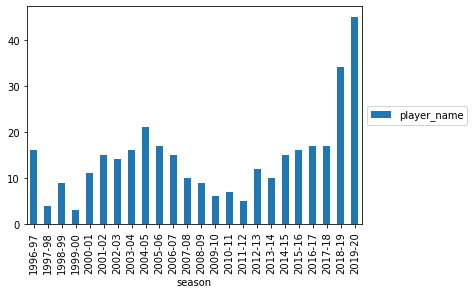

In [108]:
df_uniq[df_uniq['college'] == 'None'].groupby(['season'])['player_name'].count().plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



There may be a trend on the NBA for hiring non college players, but this can only be verified with the data from upcoming years.

### future questions: best player (net rating) of this period, best college nba player maker (net rating), height x reb, heatmap, 